# Observations

## #1
This is my observation

## #2
This is my observation

## #3
This is my observation

In [255]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Check the number of mice.
print(len(merge_df["Mouse ID"].unique()))

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_id = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicated_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupicated_id_all = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'], False)]
dupicated_id_all

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'].isin(duplicated_id) == False]

In [6]:
# Check the number of mice in the clean DataFrame.
print(len(clean_df["Mouse ID"].unique()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
regimen_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
regimen_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
regimen_stDev = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
regimen_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem() 


# Use this straighforward method, create multiple series and put them all in a dataframe at the end.

summary_df = pd.DataFrame({'Mean Tumor Volume': regimen_mean,
                            'Median Tumor Volume' : regimen_median,
                            'Tumor Volume Variance': regimen_var,
                            'Tumor Volume Std. Dev.' : regimen_stDev,
                            'Tumor Volume Std. Err.' : regimen_sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Drug_and_Tumor = clean_df[['Drug Regimen','Tumor Volume (mm3)']]

# Use method to produce everything with a single groupby function
summary_stats = Drug_and_Tumor.groupby('Drug Regimen').agg([np.mean, np.median, np.var, np.std, st.sem])
summary_stats

C:\Users\tawnyn\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\tawnyn\Anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\tawnyn\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

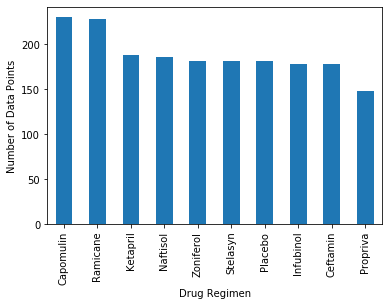

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
count_mice_by_regimen = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"].sort_values(ascending=False)

count_mice_by_regimen.plot(kind="bar")

#set chart title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

#show chart and set layout
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Number of Data Points')

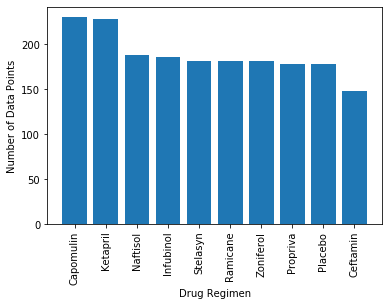

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Create values for bar chart
count_mice = [row for row in count_mice_by_regimen.iloc[0:,]]

# Create x axis
drug_name = clean_df['Drug Regimen'].unique()
tick_locations = [value for value in drug_name]

plt.bar(drug_name, count_mice)
plt.xticks(tick_locations, drug_name, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

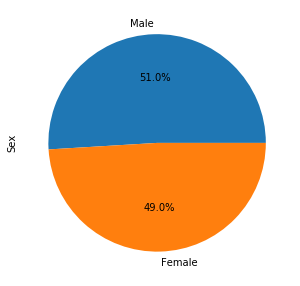

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_distribution = clean_df.groupby(["Sex"]).count()["Mouse ID"].sort_values(ascending=False)

# Plot
plot = sex_distribution.plot.pie(y='Mouse ID', figsize=(5, 5), autopct='%1.1f%%', label='Sex')

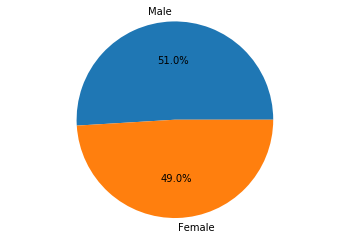

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# set dataset
my_data = clean_df.groupby(["Sex"]).count()["Mouse ID"].sort_values(ascending=False)

# set lables
my_labels = sex_distribution.index

# Plot pie chart
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby("Mouse ID").max()
max_timepoint_ony = max_timepoint[["Timepoint"]]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint = pd.merge(max_timepoint_ony, clean_df, on=["Mouse ID","Timepoint"])
last_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [234]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volumes = last_timepoint[last_timepoint["Drug Regimen"] == drug].iloc[:,2]
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq    
    
    # add subset to tumor volume data list
    tumor_vol_list.append(volumes)
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)  
    
    for x in volumes:

        if x >= upper_bound or x <= lower_bound:          
              print(f"{drug}'s potential outliers: Series({x})")

Infubinol's potential outliers: Series(36.321345799999996)


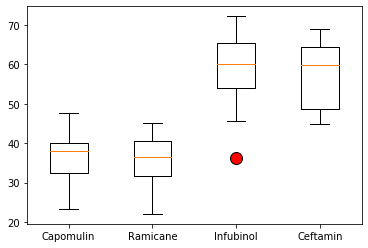

In [192]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# fig1, ax1 = plt.subplots()
# ax1.set_ylabel('Reaction Time (ms)')
# ax1.boxplot(tumor_vol_list)
# plt.show()
red_circle = dict(markerfacecolor='r', marker='o', markersize=12)

fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_list, flierprops=red_circle)
plt.xticks([1, 2, 3, 4], [treatment_list[0], treatment_list[1], treatment_list[2], treatment_list[3]])
plt.show()

# Line and Scatter Plots

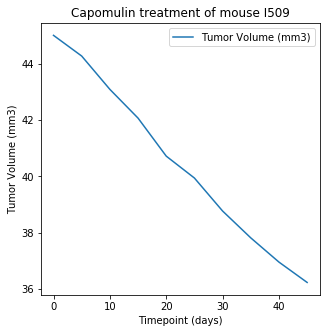

<Figure size 432x288 with 0 Axes>

In [193]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter out Capomulin
capomulin_timepoints = clean_df[clean_df["Drug Regimen"] == "Capomulin"].groupby(["Timepoint"]).mean()

# Create df for plotting
capomulin_timepoints_volume = capomulin_timepoints[["Tumor Volume (mm3)"]]

# Plot line graph
fig = capomulin_timepoints_volume.plot(kind="line", figsize=(5,5))
plt.title("Capomulin treatment of mouse I509")
fig.set_xlabel("Timepoint (days)")
fig.set_ylabel("Tumor Volume (mm3)")
plt.show()
plt.tight_layout()

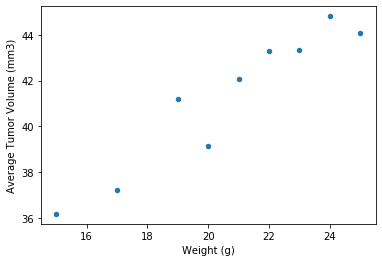

In [194]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Filter out Capomulin as a new df
capomulin_weight = pd.DataFrame(clean_df[clean_df["Drug Regimen"] == "Capomulin"].groupby(["Weight (g)"]).mean()).reset_index()

# Rename to average
capomulin_weight["Average Tumor Volume (mm3)"] = capomulin_weight["Tumor Volume (mm3)"]

# Plot scatter plot
capomulin_weight.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", figsize=(6,4))
plt.show()

# Correlation and Regression

The correlation between mouse weight and average tumor volume factors is 0.95


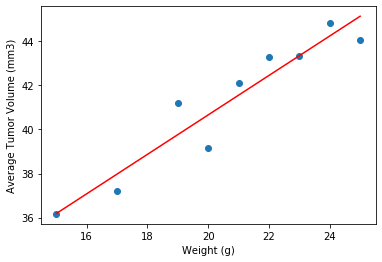

In [195]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = capomulin_weight.iloc[:,0]
avg_tumor = capomulin_weight.iloc[:,2]
correlation = st.pearsonr(weight,avg_tumor)
print(f"The correlation between mouse weight and average tumor volume factors is {round(correlation[0],2)}")

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor)

# Get regression values
regress_values = weight * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(weight, avg_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(weight,regress_values,"r-")
plt.show()